In [1]:
from helpers import (
    get_retriever,
    load_pdf,
    get_connection,
    get_embeddings,
    compare_chains,
    load_jsonl,
    load_graph,
    show_graph,
)
from langchain.chains import FlareChain, RetrievalQA, GraphQAChain

c:\Users\minia\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
llm = get_connection()
# documents = load_pdf(file_path="data/inputs/deeplearningbook.pdf", start_page=15, end_page=17)
documents = load_pdf(file_path="data/inputs/Active Retrieval Augmented Generation.pdf", start_page=1, end_page=24)
embeddings = get_embeddings()
retriever = get_retriever(documents=documents, embeddings=embeddings)
documents

Number of Document objects before recursive splitting: 23
Number of Document objects after recursive splitting: 481


[Document(page_content='Active Retrieval Augmented Generation\nZhengbaoJiang1∗ FrankF.Xu1∗ LuyuGao1∗ ZhiqingSun1∗ QianLiu2\nJaneDwivedi-Yu3 YimingYang1 JamieCallan1 GrahamNeubig1\n1LanguageTechnologiesInstitute,CarnegieMellonUniversity\n2SeaAILab 3FAIR,Meta\n{zhengbaj,fangzhex,luyug,zhiqings,gneubig}@cs.cmu.edu\nAbstract hallucinateandcreateimaginarycontent(Maynez\netal.,2020;Zhouetal.,2021). AugmentingLMs\nDespite the remarkable ability of large lan-\nwithretrievalcomponentsthatlookuprelevantin-\nguagemodels(LMs)tocomprehendandgen-\nformationfromexternalknowledgeresourcesisa\nerate language, they have a tendency to hal-\npromisingdirectiontoaddresshallucination(Khan-\nlucinate and create factually inaccurate out-\nput. AugmentingLMsbyretrievinginforma- delwaletal.,2020;Izacardetal.,2022).\ntionfromexternalknowledgeresourcesisone Retrieval augmented LMs commonly use a\npromisingsolution. Mostexistingretrievalaug-\nretrieve-and-generatesetupwheretheyretrievedoc-\nmented LMs employ a ret

Graph has been deserialized and loaded from debug/graph.pickle.


c:\Users\minia\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygraphviz\agraph.py:1407: RuntimeWarning: Warning: Overlap value "prism" unsupported - ignored

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


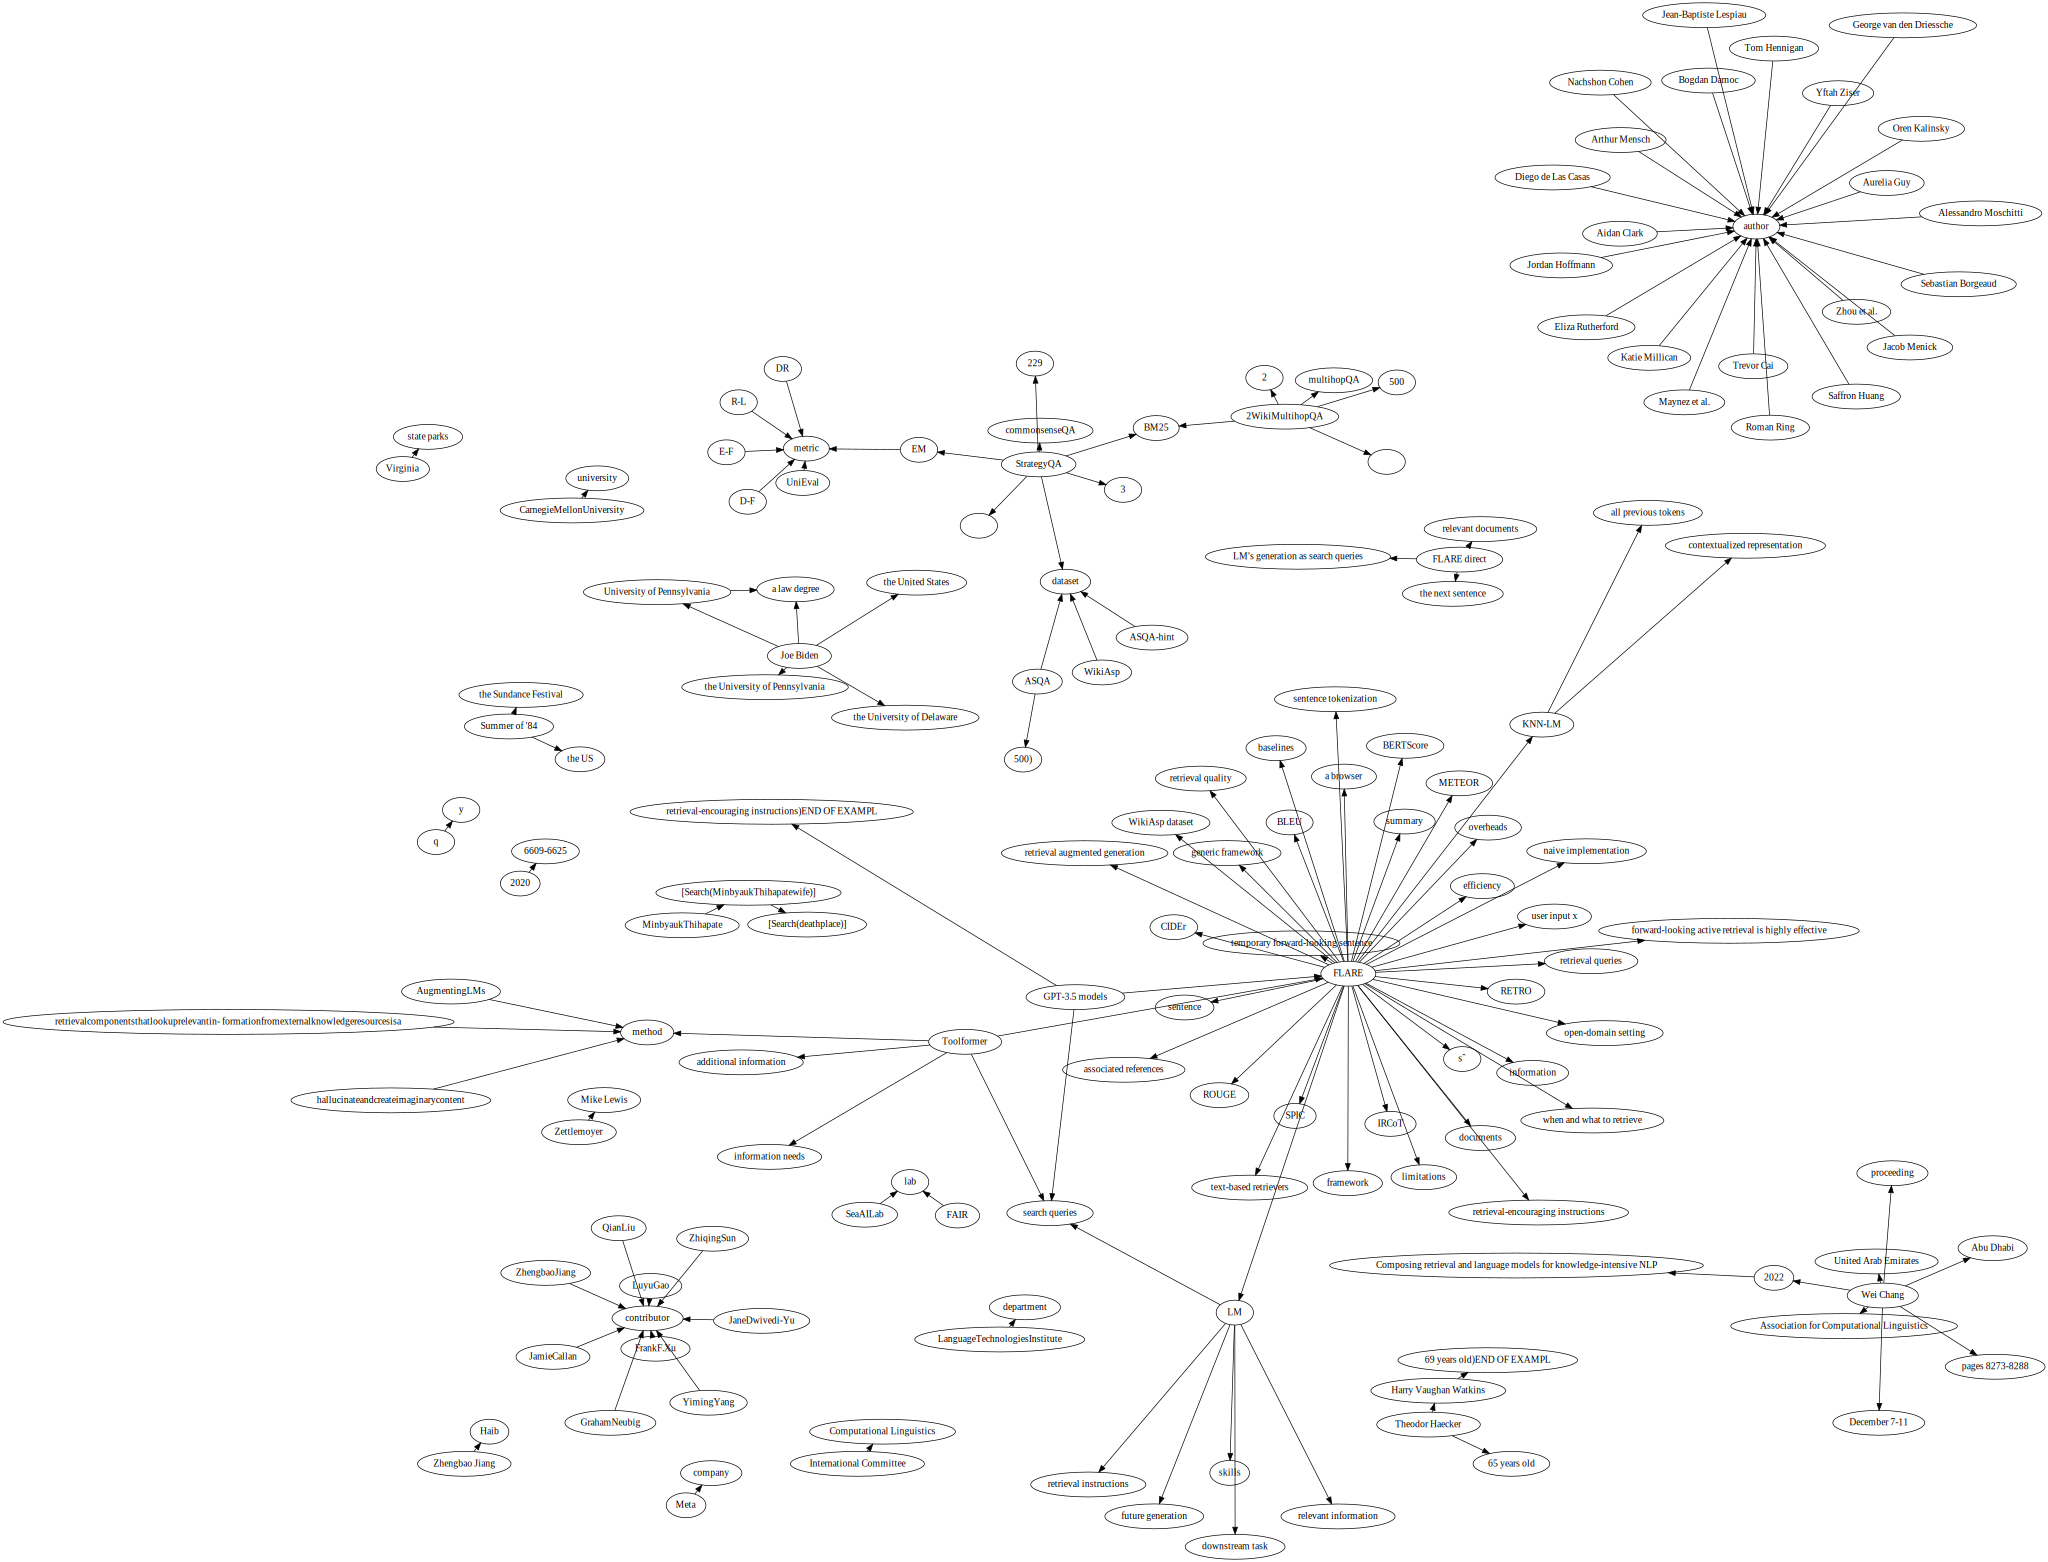

In [3]:
graph = load_graph(llm=llm, documents=documents)
show_graph(graph=graph)

In [4]:
flare_chain_max_iter_2 = FlareChain.from_llm(
    llm=llm, retriever=retriever, max_iter=2, verbose=True
)
flare_chain_max_iter_4 = FlareChain.from_llm(
    llm=llm, retriever=retriever, max_iter=4, verbose=True
)
flare_chain_max_iter_6 = FlareChain.from_llm(
    llm=llm, retriever=retriever, max_iter=6, verbose=True
)
flare_chain_max_iter_8 = FlareChain.from_llm(
    llm=llm, retriever=retriever, max_iter=8, verbose=True
)
flare_chain_max_iter_10 = FlareChain.from_llm(
    llm=llm, retriever=retriever, max_iter=10, verbose=True
)
retrieval_chain = RetrievalQA.from_llm(llm=llm, retriever=retriever, verbose=True)
graph_chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)
chains = {
    "RetrievalQA": retrieval_chain,
    "FLARE-max_iter_2": flare_chain_max_iter_2,
    #"FLARE-max_iter_4": flare_chain_max_iter_4,
    #"FLARE-max_iter_6": flare_chain_max_iter_6,
    #"FLARE-max_iter_8": flare_chain_max_iter_8,
    "FLARE-max_iter_10": flare_chain_max_iter_10,
    "GraphQA": graph_chain,
}

In [5]:
data = load_jsonl()
data

{'question': {0: 'What is the main challenge addressed by active retrieval augmented generation in large language models?',
  1: 'What type of information does FLARE retrieve during sentence generation if it encounters low-confidence tokens?',
  2: 'Which method outperforms others on long-form knowledge-intensive generation tasks according to the paper?',
  3: 'Why is active retrieval augmented generation important for scenarios involving long texts?',
  4: 'What are the limitations of traditional language models (LMs) when generating long-form content?',
  5: 'How does FLARE handle the trade-off between retrieval and generation?',
  6: 'What is the role of the retrieval buffer in FLARE?',
  7: 'Can FLARE be fine-tuned on specific domains or tasks?',
  8: "What are the key evaluation metrics used to assess FLARE's performance?",
  9: 'Where can I find the code and datasets related to FLARE?'},
 'reference_answer': {0: 'The main challenge addressed by active retrieval augmented generati

Starting comparison for following question: What is the main challenge addressed by active retrieval augmented generation in large language models?


> Entering new RetrievalQA chain...

> Finished chain.
For chain RetrievalQA was provided following answer:

The main challenge addressed by active retrieval augmented generation in large language models is improving the performance of language models in tasks such as reading comprehension and question-answering.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.890
Euclidean Distance: 0.468
BERTScore F1: 0.924
ROUGE-1 F-score: 0.533
BLEU Score: 0.266
Jaccard Similarity: 0.481



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What is the main challenge addressed by active retrieval augmented generation in large language models?
>>> RESPONSE: 
Current Response:  
The main challenge addressed by active retrieval augmented generation in large language models is the ability to generate high-quality and relevant responses to user queries. This is achieved by
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What is the mai

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.888
Euclidean Distance: 0.472
BERTScore F1: 0.895
ROUGE-1 F-score: 0.538
BLEU Score: 0.208
Jaccard Similarity: 0.289



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What is the main challenge addressed by active retrieval augmented generation in large language models?
>>> RESPONSE: 
Current Response:  
The main challenge addressed by active retrieval augmented generation in large language models is the ability to generate high-quality and relevant responses to user queries. This is achieved by
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What is the mai

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.886
Euclidean Distance: 0.477
BERTScore F1: 0.893
ROUGE-1 F-score: 0.483
BLEU Score: 0.168
Jaccard Similarity: 0.241



> Entering new GraphQAChain chain...
Entities Extracted:
 NONE
Full Context:


> Finished chain.
For chain GraphQA was provided following answer:


The main challenge addressed by active retrieval augmented generation in large language models is improving the efficiency and accuracy of information retrieval and generation tasks.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.942
Euclidean Distance: 0.340
BERTScore F1: 0.932
ROUGE-1 F-score: 0.596
BLEU Score: 0.265
Jaccard Similarity: 0.542

Starting comparison for following question: What type of information does FLARE retrieve during sentence generation if it encounters low-confidence tokens?


> Entering new RetrievalQA chain...

> Finished chain.
For chain RetrievalQA was provided following answer:
 FLARE retrieves search queries during sentence generation if it encounters low-confidence tokens.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.887
Euclidean Distance: 0.475
BERTScore F1: 0.933
ROUGE-1 F-score: 0.286
BLEU Score: 0.012
Jaccard Similarity: 0.421



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What type of information does FLARE retrieve during sentence generation if it encounters low-confidence tokens?
>>> RESPONSE: 
Current Response:  
FLARE retrieves information such as the part-of-speech tags, dependency labels, and named entities of the low-confidence tokens in order to generate a more accurate
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What type of information does FLARE r

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.857
Euclidean Distance: 0.535
BERTScore F1: 0.882
ROUGE-1 F-score: 0.340
BLEU Score: 0.025
Jaccard Similarity: 0.114



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What type of information does FLARE retrieve during sentence generation if it encounters low-confidence tokens?
>>> RESPONSE: 
Current Response:  
FLARE retrieves information such as the part-of-speech tags, dependency labels, and named entities of the low-confidence tokens in order to generate a more accurate
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What type of information does FLARE r

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.857
Euclidean Distance: 0.535
BERTScore F1: 0.882
ROUGE-1 F-score: 0.333
BLEU Score: 0.025
Jaccard Similarity: 0.114



> Entering new GraphQAChain chain...
Entities Extracted:
 FLARE, sentence generation, low-confidence tokens
Full Context:
FLARE is a framework
FLARE is for retrieval augmented generation
FLARE is a generic framework
FLARE actively decides when and what to retrieve
FLARE generates retrieval queries
FLARE uses retrieval-encouraging instructions
FLARE outperforms baselines
FLARE confirms forward-looking active retrieval is highly effective
FLARE is built on text-based retrievers
FLARE can be combined with a browser
FLARE can potentially improve retrieval quality
FLARE starts with user input x
FLARE uses LM
FLARE generates sˆ
FLARE generates temporary forward-looking sentence
FLARE uses sentence tokenization
FLARE retrieves documents
FLARE generates sentence
FLARE uses efficiency
FLARE uses KNN-LM
FLARE uses RETRO
FLARE uses IRCoT
FLARE uses naive imp

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.500
Euclidean Distance: 1.000
BERTScore F1: 0.863
ROUGE-1 F-score: 0.231
BLEU Score: 0.000
Jaccard Similarity: 0.059

Starting comparison for following question: Which method outperforms others on long-form knowledge-intensive generation tasks according to the paper?


> Entering new RetrievalQA chain...

> Finished chain.
For chain RetrievalQA was provided following answer:
 FLARE


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.018
Euclidean Distance: 1.402
BERTScore F1: 0.777
ROUGE-1 F-score: 0.077
BLEU Score: 0.000
Jaccard Similarity: 0.000



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Which method outperforms others on long-form knowledge-intensive generation tasks according to the paper?
>>> RESPONSE: 
Current Response:  
According to the paper, the method that outperforms others on long-form knowledge-intensive generation tasks is the Transformer-XL model. It achieved the highest scores
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Which method outperforms others on long

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.740
Euclidean Distance: 0.721
BERTScore F1: 0.905
ROUGE-1 F-score: 0.190
BLEU Score: 0.006
Jaccard Similarity: 0.250



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Which method outperforms others on long-form knowledge-intensive generation tasks according to the paper?
>>> RESPONSE: 
Current Response:  
According to the paper, the method that outperforms others on long-form knowledge-intensive generation tasks is the Transformer-XL model. It achieved the highest scores
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Which method outperforms others on long

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.741
Euclidean Distance: 0.720
BERTScore F1: 0.904
ROUGE-1 F-score: 0.229
BLEU Score: 0.005
Jaccard Similarity: 0.208



> Entering new GraphQAChain chain...
Entities Extracted:
 NONE
Full Context:


> Finished chain.
For chain GraphQA was provided following answer:


The paper does not specify which method outperforms others on long-form knowledge-intensive generation tasks.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.954
Euclidean Distance: 0.302
BERTScore F1: 0.955
ROUGE-1 F-score: 0.103
BLEU Score: 0.006
Jaccard Similarity: 0.350

Starting comparison for following question: Why is active retrieval augmented generation important for scenarios involving long texts?


> Entering new RetrievalQA chain...

> Finished chain.
For chain RetrievalQA was provided following answer:

Active retrieval augmented generation is important for scenarios involving long texts because it allows for more efficient and effective retrieval of relevant information from previously retrieved documents. This can help improve the overall quality and coherence of the generated text, as well as reduce the computational cost of generating long texts. Additionally, by actively retrieving relevant information, the system can better adapt to changing contexts and generate more relevant and accurate content.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.879
Euclidean Distance: 0.492
BERTScore F1: 0.879
ROUGE-1 F-score: 0.341
BLEU Score: 0.057
Jaccard Similarity: 0.153



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Why is active retrieval augmented generation important for scenarios involving long texts?
>>> RESPONSE: 
Current Response:  
Active retrieval augmented generation is important for scenarios involving long texts because it allows for more efficient and accurate generation of text. By actively retrieving relevant information from the text
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Why is ac

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.907
Euclidean Distance: 0.431
BERTScore F1: 0.882
ROUGE-1 F-score: 0.354
BLEU Score: 0.073
Jaccard Similarity: 0.180



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Why is active retrieval augmented generation important for scenarios involving long texts?
>>> RESPONSE: 
Current Response:  
Active retrieval augmented generation is important for scenarios involving long texts because it allows for more efficient and accurate generation of text. By actively retrieving relevant information from the text
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Why is ac

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.893
Euclidean Distance: 0.462
BERTScore F1: 0.872
ROUGE-1 F-score: 0.333
BLEU Score: 0.052
Jaccard Similarity: 0.152



> Entering new GraphQAChain chain...
Entities Extracted:
 NONE
Full Context:


> Finished chain.
For chain GraphQA was provided following answer:


Active retrieval augmented generation is important for scenarios involving long texts because it allows for more efficient and effective learning and retention of information. By actively retrieving information from memory and using it to generate new content, individuals are able to better understand and process the information, leading to improved comprehension and retention. This is especially important for long texts, as it can be challenging to retain large amounts of information without actively engaging with it.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.896
Euclidean Distance: 0.457
BERTScore F1: 0.879
ROUGE-1 F-score: 0.360
BLEU Score: 0.063
Jaccard Similarity: 0.145

Starting comparison for following question: What are the limitations of traditional language models (LMs) when generating long-form content?


> Entering new RetrievalQA chain...

> Finished chain.
For chain RetrievalQA was provided following answer:
 The limitations of traditional language models when generating long-form content include their inability to incorporate additional information while generating and their lack of comprehensive answers to questions seeking complex reasoning and understanding.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.696
Euclidean Distance: 0.780
BERTScore F1: 0.906
ROUGE-1 F-score: 0.111
BLEU Score: 0.008
Jaccard Similarity: 0.250



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What are the limitations of traditional language models (LMs) when generating long-form content?
>>> RESPONSE: 
Current Response:  
Traditional language models (LMs) have several limitations when it comes to generating long-form content. One of the main limitations is that they often struggle with maintaining
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What are the limitations of traditiona

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.896
Euclidean Distance: 0.457
BERTScore F1: 0.894
ROUGE-1 F-score: 0.164
BLEU Score: 0.006
Jaccard Similarity: 0.200



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What are the limitations of traditional language models (LMs) when generating long-form content?
>>> RESPONSE: 
Current Response:  
Traditional language models (LMs) have several limitations when it comes to generating long-form content. One of the main limitations is that they often struggle with maintaining
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What are the limitations of traditiona

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.858
Euclidean Distance: 0.534
BERTScore F1: 0.886
ROUGE-1 F-score: 0.176
BLEU Score: 0.007
Jaccard Similarity: 0.149



> Entering new GraphQAChain chain...
Entities Extracted:
 LMs
Full Context:


> Finished chain.
For chain GraphQA was provided following answer:

1. Limited Context: Traditional LMs have a fixed context window, which means they can only consider a limited number of words before and after the current word. This can result in generating content that lacks coherence and may not capture the full meaning of the text.

2. Lack of Domain-Specific Knowledge: Traditional LMs are trained on general language data and may not have specific knowledge about a particular domain. This can lead to generating content that is not relevant or accurate for a specific topic or subject.

3. Inability to Handle Rare or Unseen Words: Traditional LMs rely on statistical patterns in the training data and may struggle with generating content for rare or unseen words. This ca

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.698
Euclidean Distance: 0.777
BERTScore F1: 0.834
ROUGE-1 F-score: 0.110
BLEU Score: 0.003
Jaccard Similarity: 0.056

Starting comparison for following question: How does FLARE handle the trade-off between retrieval and generation?


> Entering new RetrievalQA chain...

> Finished chain.
For chain RetrievalQA was provided following answer:
 FLARE uses an active retrieval augmented generation framework to decide when and what to retrieve during generation, allowing it to effectively handle the trade-off between retrieval and generation.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.793
Euclidean Distance: 0.644
BERTScore F1: 0.911
ROUGE-1 F-score: 0.240
BLEU Score: 0.022
Jaccard Similarity: 0.259



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: How does FLARE handle the trade-off between retrieval and generation?
>>> RESPONSE: 
Current Response:  FLARE uses a hybrid approach that combines both retrieval and generation techniques. It first retrieves relevant information from a large knowledge base, and then uses that information to generate
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: How does FLARE handle the trade-off between retr

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.635
Euclidean Distance: 0.854
BERTScore F1: 0.875
ROUGE-1 F-score: 0.203
BLEU Score: 0.021
Jaccard Similarity: 0.106



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: How does FLARE handle the trade-off between retrieval and generation?
>>> RESPONSE: 
Current Response:  FLARE uses a combination of retrieval and generation techniques to handle this trade-off. It first retrieves relevant information from a large knowledge base, and then uses that information
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: How does FLARE handle the trade-off between retrieval a

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.654
Euclidean Distance: 0.832
BERTScore F1: 0.893
ROUGE-1 F-score: 0.232
BLEU Score: 0.022
Jaccard Similarity: 0.133



> Entering new GraphQAChain chain...
Entities Extracted:
 FLARE
Full Context:
FLARE is a framework
FLARE is for retrieval augmented generation
FLARE is a generic framework
FLARE actively decides when and what to retrieve
FLARE generates retrieval queries
FLARE uses retrieval-encouraging instructions
FLARE outperforms baselines
FLARE confirms forward-looking active retrieval is highly effective
FLARE is built on text-based retrievers
FLARE can be combined with a browser
FLARE can potentially improve retrieval quality
FLARE starts with user input x
FLARE uses LM
FLARE generates sˆ
FLARE generates temporary forward-looking sentence
FLARE uses sentence tokenization
FLARE retrieves documents
FLARE generates sentence
FLARE uses efficiency
FLARE uses KNN-LM
FLARE uses RETRO
FLARE uses IRCoT
FLARE uses naive implementation
FLARE increases overheads
FLARE 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.663
Euclidean Distance: 0.820
BERTScore F1: 0.884
ROUGE-1 F-score: 0.232
BLEU Score: 0.012
Jaccard Similarity: 0.128

Starting comparison for following question: What is the role of the retrieval buffer in FLARE?


> Entering new RetrievalQA chain...

> Finished chain.
For chain RetrievalQA was provided following answer:
 The retrieval buffer in FLARE is used to iteratively use the upcoming sentence to provide a brief hint for the model, helping it to stay on topic and outperform the baseline.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.679
Euclidean Distance: 0.801
BERTScore F1: 0.880
ROUGE-1 F-score: 0.333
BLEU Score: 0.042
Jaccard Similarity: 0.161



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What is the role of the retrieval buffer in FLARE?
>>> RESPONSE: 
Current Response:  
The retrieval buffer in FLARE is responsible for temporarily storing information that has been retrieved from long-term memory. It acts as a temporary holding place for this information
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What is the role of the retrieval buffer in FLARE?
>>> RESPONSE:  
The retrie

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.840
Euclidean Distance: 0.566
BERTScore F1: 0.872
ROUGE-1 F-score: 0.290
BLEU Score: 0.022
Jaccard Similarity: 0.096



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What is the role of the retrieval buffer in FLARE?
>>> RESPONSE: 
Current Response:  
The retrieval buffer in FLARE is responsible for temporarily storing information that has been retrieved from long-term memory. It acts as a temporary holding place for this information
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What is the role of the retrieval buffer in FLARE?
>>> RESPONSE:  
The retrie

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.840
Euclidean Distance: 0.566
BERTScore F1: 0.872
ROUGE-1 F-score: 0.286
BLEU Score: 0.022
Jaccard Similarity: 0.096



> Entering new GraphQAChain chain...
Entities Extracted:
 FLARE
Full Context:
FLARE is a framework
FLARE is for retrieval augmented generation
FLARE is a generic framework
FLARE actively decides when and what to retrieve
FLARE generates retrieval queries
FLARE uses retrieval-encouraging instructions
FLARE outperforms baselines
FLARE confirms forward-looking active retrieval is highly effective
FLARE is built on text-based retrievers
FLARE can be combined with a browser
FLARE can potentially improve retrieval quality
FLARE starts with user input x
FLARE uses LM
FLARE generates sˆ
FLARE generates temporary forward-looking sentence
FLARE uses sentence tokenization
FLARE retrieves documents
FLARE generates sentence
FLARE uses efficiency
FLARE uses KNN-LM
FLARE uses RETRO
FLARE uses IRCoT
FLARE uses naive implementation
FLARE increases overheads
FLARE 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.693
Euclidean Distance: 0.783
BERTScore F1: 0.891
ROUGE-1 F-score: 0.390
BLEU Score: 0.053
Jaccard Similarity: 0.208

Starting comparison for following question: Can FLARE be fine-tuned on specific domains or tasks?


> Entering new RetrievalQA chain...

> Finished chain.
For chain RetrievalQA was provided following answer:
 Yes, FLARE can be fine-tuned on specific domains or tasks as shown in the context where it is evaluated on 4 diverse knowledge-intensive tasks.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.903
Euclidean Distance: 0.440
BERTScore F1: 0.928
ROUGE-1 F-score: 0.409
BLEU Score: 0.215
Jaccard Similarity: 0.280



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Can FLARE be fine-tuned on specific domains or tasks?
>>> RESPONSE: 
Current Response:  
Yes, FLARE can be fine-tuned on specific domains or tasks. This is one of the key features of FLARE, as it allows for more
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Can FLARE be fine-tuned on specific domains or tasks?
>>> RESPONSE:  
Yes, FLARE can be fine-tuned on specific domains or tasks. This is 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.934
Euclidean Distance: 0.364
BERTScore F1: 0.907
ROUGE-1 F-score: 0.444
BLEU Score: 0.114
Jaccard Similarity: 0.163



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Can FLARE be fine-tuned on specific domains or tasks?
>>> RESPONSE: 
Current Response:  
Yes, FLARE can be fine-tuned on specific domains or tasks. This is one of the key features of FLARE, as it allows for more
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Can FLARE be fine-tuned on specific domains or tasks?
>>> RESPONSE:  
Yes, FLARE can be fine-tuned on specific domains or tasks. This is 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.919
Euclidean Distance: 0.404
BERTScore F1: 0.905
ROUGE-1 F-score: 0.429
BLEU Score: 0.098
Jaccard Similarity: 0.143



> Entering new GraphQAChain chain...
Entities Extracted:
 FLARE
Full Context:
FLARE is a framework
FLARE is for retrieval augmented generation
FLARE is a generic framework
FLARE actively decides when and what to retrieve
FLARE generates retrieval queries
FLARE uses retrieval-encouraging instructions
FLARE outperforms baselines
FLARE confirms forward-looking active retrieval is highly effective
FLARE is built on text-based retrievers
FLARE can be combined with a browser
FLARE can potentially improve retrieval quality
FLARE starts with user input x
FLARE uses LM
FLARE generates sˆ
FLARE generates temporary forward-looking sentence
FLARE uses sentence tokenization
FLARE retrieves documents
FLARE generates sentence
FLARE uses efficiency
FLARE uses KNN-LM
FLARE uses RETRO
FLARE uses IRCoT
FLARE uses naive implementation
FLARE increases overheads
FLARE 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.968
Euclidean Distance: 0.252
BERTScore F1: 0.970
ROUGE-1 F-score: 0.500
BLEU Score: 0.151
Jaccard Similarity: 0.583

Starting comparison for following question: What are the key evaluation metrics used to assess FLARE's performance?


> Entering new RetrievalQA chain...

> Finished chain.
For chain RetrievalQA was provided following answer:
 The key evaluation metrics used to assess FLARE's performance are EM (Exact Match), F1 score, Precision, and Recall.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.858
Euclidean Distance: 0.533
BERTScore F1: 0.912
ROUGE-1 F-score: 0.211
BLEU Score: 0.022
Jaccard Similarity: 0.381



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What are the key evaluation metrics used to assess FLARE's performance?
>>> RESPONSE: 
Current Response:  
Some key evaluation metrics used to assess FLARE's performance include accuracy, precision, recall, and F1 score. These metrics help measure the effectiveness and efficiency
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What are the key evaluation metrics used to assess FLARE's performan

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.880
Euclidean Distance: 0.489
BERTScore F1: 0.902
ROUGE-1 F-score: 0.258
BLEU Score: 0.014
Jaccard Similarity: 0.178



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What are the key evaluation metrics used to assess FLARE's performance?
>>> RESPONSE: 
Current Response:  
Some key evaluation metrics used to assess FLARE's performance include accuracy, precision, recall, and F1 score. These metrics help measure the effectiveness and efficiency
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: What are the key evaluation metrics used to assess FLARE's performan

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.870
Euclidean Distance: 0.510
BERTScore F1: 0.896
ROUGE-1 F-score: 0.232
BLEU Score: 0.012
Jaccard Similarity: 0.157



> Entering new GraphQAChain chain...
Entities Extracted:
 FLARE
Full Context:
FLARE is a framework
FLARE is for retrieval augmented generation
FLARE is a generic framework
FLARE actively decides when and what to retrieve
FLARE generates retrieval queries
FLARE uses retrieval-encouraging instructions
FLARE outperforms baselines
FLARE confirms forward-looking active retrieval is highly effective
FLARE is built on text-based retrievers
FLARE can be combined with a browser
FLARE can potentially improve retrieval quality
FLARE starts with user input x
FLARE uses LM
FLARE generates sˆ
FLARE generates temporary forward-looking sentence
FLARE uses sentence tokenization
FLARE retrieves documents
FLARE generates sentence
FLARE uses efficiency
FLARE uses KNN-LM
FLARE uses RETRO
FLARE uses IRCoT
FLARE uses naive implementation
FLARE increases overheads
FLARE 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.817
Euclidean Distance: 0.605
BERTScore F1: 0.865
ROUGE-1 F-score: 0.324
BLEU Score: 0.013
Jaccard Similarity: 0.217

Starting comparison for following question: Where can I find the code and datasets related to FLARE?


> Entering new RetrievalQA chain...

> Finished chain.
For chain RetrievalQA was provided following answer:
 The code and datasets related to FLARE can be found in the FLARE instruct implementation details and in Table1.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.858
Euclidean Distance: 0.533
BERTScore F1: 0.901
ROUGE-1 F-score: 0.333
BLEU Score: 0.134
Jaccard Similarity: 0.350



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Where can I find the code and datasets related to FLARE?
>>> RESPONSE: 
Current Response:  
You can find the code and datasets related to FLARE on the project's GitHub repository.
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Where can I find the code and datasets related to FLARE?
>>> RESPONSE:  
You can find the code and datasets related to FLARE on the project's GitHub repository.

> Finis

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.944
Euclidean Distance: 0.333
BERTScore F1: 0.922
ROUGE-1 F-score: 0.276
BLEU Score: 0.070
Jaccard Similarity: 0.471



> Entering new FlareChain chain...
Current Response: 
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Where can I find the code and datasets related to FLARE?
>>> RESPONSE: 
Current Response:  
You can find the code and datasets related to FLARE on the project's GitHub repository.
Prompt after formatting:
Respond to the user message using any relevant context. If context is provided, you should ground your answer in that context. Once you're done responding return FINISHED.

>>> CONTEXT: 
>>> USER INPUT: Where can I find the code and datasets related to FLARE?
>>> RESPONSE:  
You can find the code and datasets related to FLARE on the project's GitHub repository.
Current 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.944
Euclidean Distance: 0.333
BERTScore F1: 0.922
ROUGE-1 F-score: 0.276
BLEU Score: 0.070
Jaccard Similarity: 0.471



> Entering new GraphQAChain chain...
Entities Extracted:
 FLARE
Full Context:
FLARE is a framework
FLARE is for retrieval augmented generation
FLARE is a generic framework
FLARE actively decides when and what to retrieve
FLARE generates retrieval queries
FLARE uses retrieval-encouraging instructions
FLARE outperforms baselines
FLARE confirms forward-looking active retrieval is highly effective
FLARE is built on text-based retrievers
FLARE can be combined with a browser
FLARE can potentially improve retrieval quality
FLARE starts with user input x
FLARE uses LM
FLARE generates sˆ
FLARE generates temporary forward-looking sentence
FLARE uses sentence tokenization
FLARE retrieves documents
FLARE generates sentence
FLARE uses efficiency
FLARE uses KNN-LM
FLARE uses RETRO
FLARE uses IRCoT
FLARE uses naive implementation
FLARE increases overheads
FLARE 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.602
Euclidean Distance: 0.892
BERTScore F1: 0.839
ROUGE-1 F-score: 0.130
BLEU Score: 0.009
Jaccard Similarity: 0.071



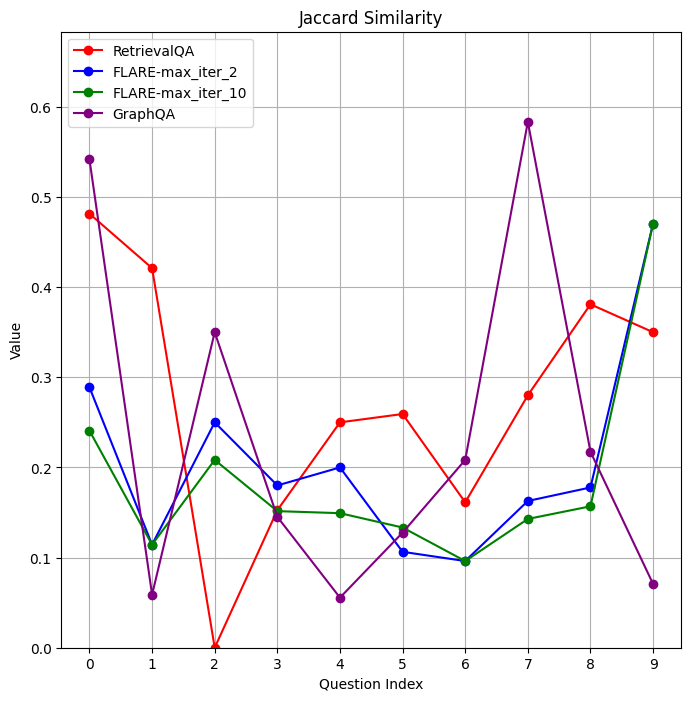

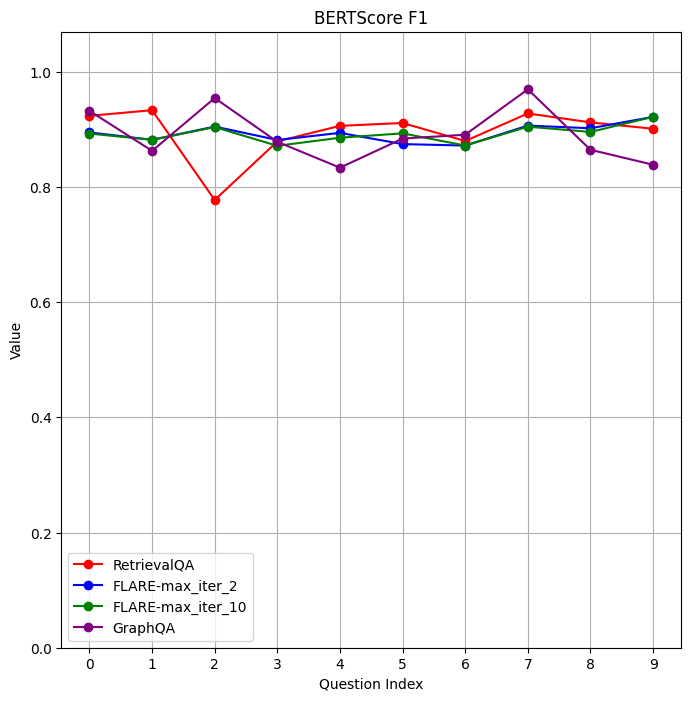

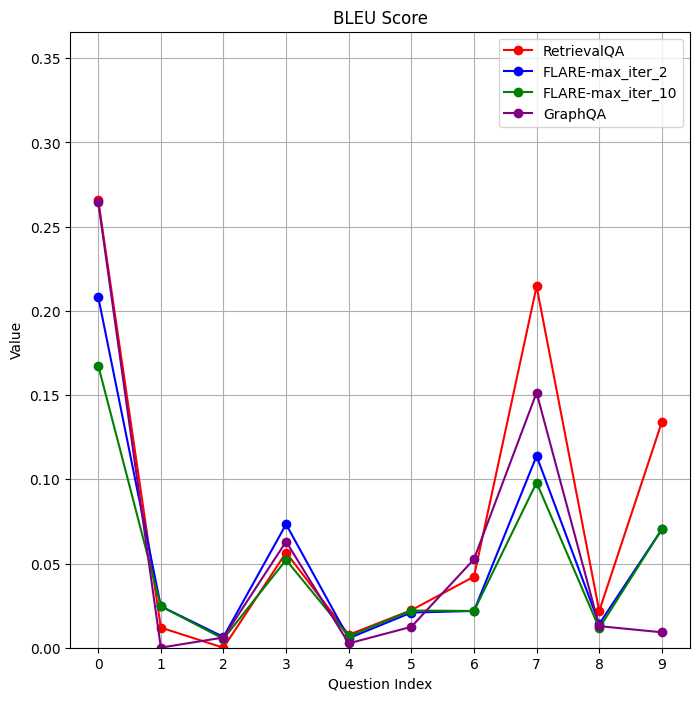

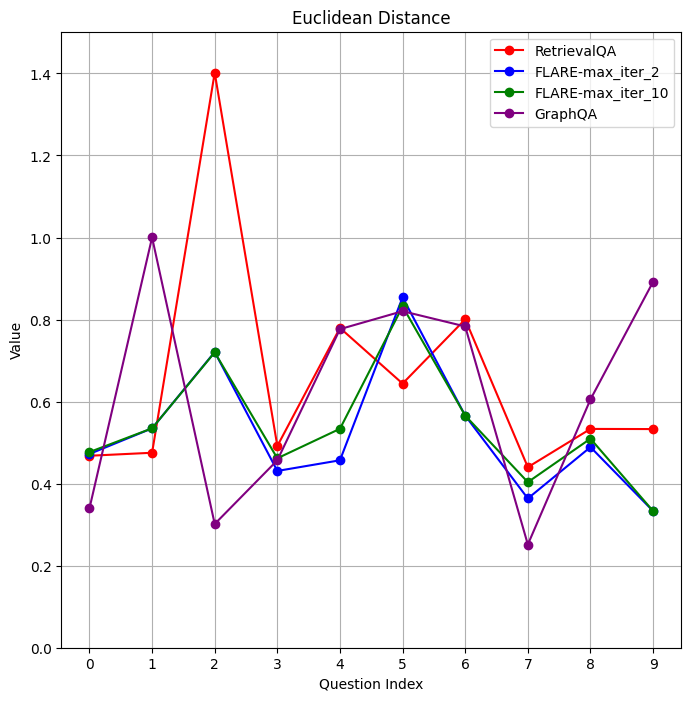

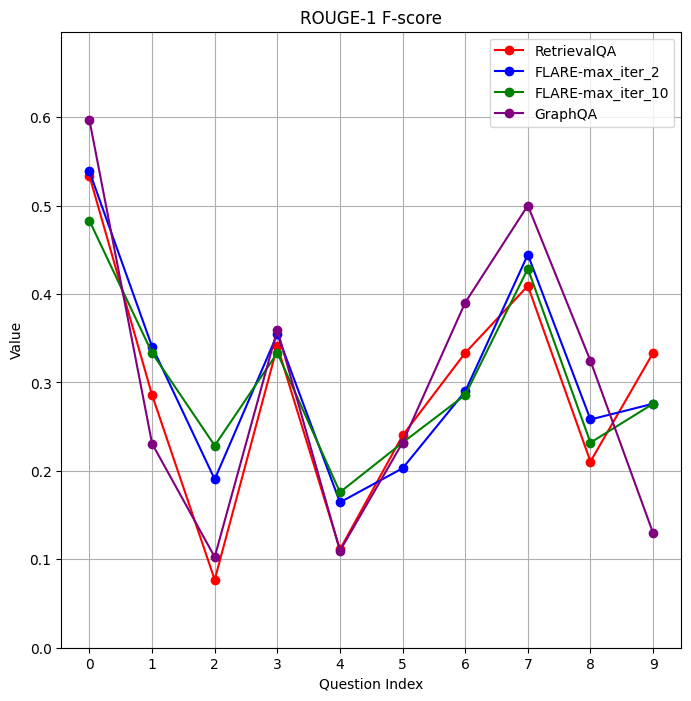

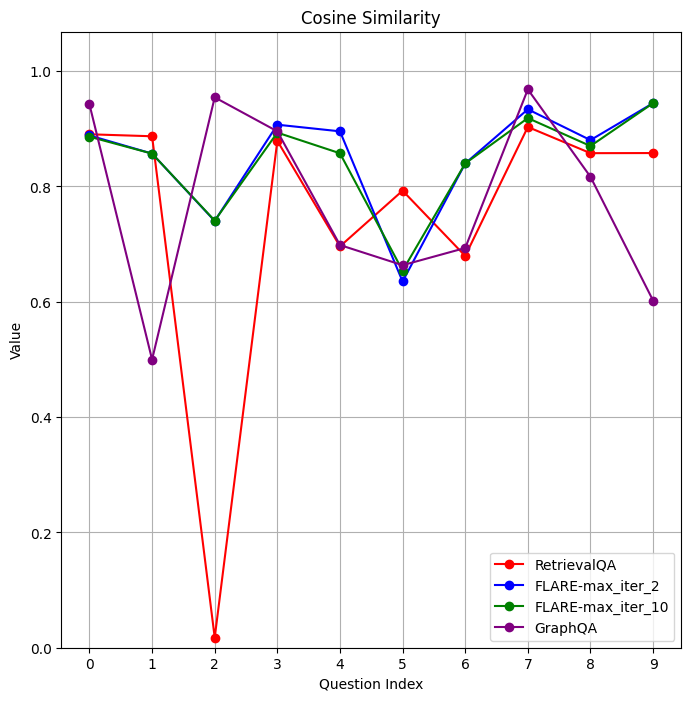

In [6]:
compare_chains(chains=chains, embeddings=embeddings, data=data, max_questions_number=10)